# **REPORT - 1**

In [1]:
!pip install datasets


In [2]:
!pip install --upgrade datasets huggingface_hub fsspec


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.0/510.0 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 22.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: huggingface_hub
    Found existing installation: huggingface-hub 0.31.2
    Uninstalling huggingface-hub-0.31.2:
      Successfully uninstalled huggingface-hub-0.31.2
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency con

In [3]:
from datasets import load_dataset
dataset = load_dataset("dair-ai/emotion")
print(dataset)
print(dataset['train'][0])


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/9.05k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})
{'text': 'i didnt feel humiliated', 'label': 0}


In [4]:
from datasets import load_dataset

dataset = load_dataset("dair-ai/emotion")


In [5]:
print(dataset)

print(dataset['train'][0])


DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})
{'text': 'i didnt feel humiliated', 'label': 0}


In [6]:
labels = dataset['train'].features['label'].names
print("Emotion labels:", labels)


Emotion labels: ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']


In [7]:
import pandas as pd

df = pd.DataFrame(dataset['train'])
df.head()


,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


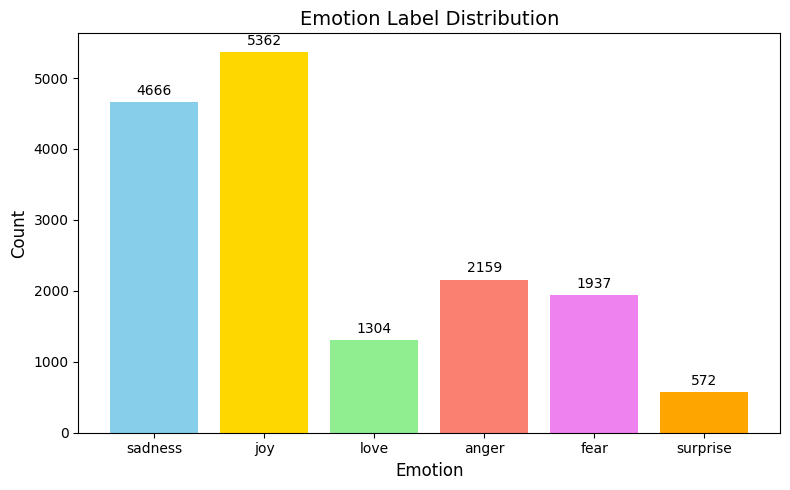

In [8]:
import matplotlib.pyplot as plt

emotion_labels = {
    0: 'sadness',
    1: 'joy',
    2: 'love',
    3: 'anger',
    4: 'fear',
    5: 'surprise'
}

label_counts = df['label'].value_counts().sort_index()

emotions = [emotion_labels[i] for i in label_counts.index]
counts = label_counts.values
colors = ['skyblue', 'gold', 'lightgreen', 'salmon', 'violet', 'orange']

plt.figure(figsize=(8, 5))
bars = plt.bar(emotions, counts, color=colors)
plt.title("Emotion Label Distribution", fontsize=14)
plt.xlabel("Emotion", fontsize=12)
plt.ylabel("Count", fontsize=12)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 100, int(yval), ha='center', fontsize=10)

plt.tight_layout()
plt.show()


In [9]:
from datasets import load_dataset
import pandas as pd

# Load dataset
dataset = load_dataset("dair-ai/emotion")

# Convert to DataFrame
df = pd.DataFrame(dataset['train'])

# Get label names from dataset metadata
label_names = dataset['train'].features['label'].names

# Add readable labels to DataFrame
df['label_name'] = df['label'].apply(lambda x: label_names[x])

# Print one sample text per emotion
for emotion in label_names:
    sample = df[df['label_name'] == emotion].sample(1)['text'].values[0]
    print(f"{emotion.upper()}: {sample}")


SADNESS: im feeling quite disillusioned about my weighins
JOY: i think this feeling is fro trusting in god and sometimes its just apathy
LOVE: i feel like this leads me to be not as gentle and kind as i should be
ANGER: i call someone i feel like i need to at least talk a few minutes to not be rude
FEAR: i have finished reading i am feeling so insecure
SURPRISE: i feel shocked have i become that old


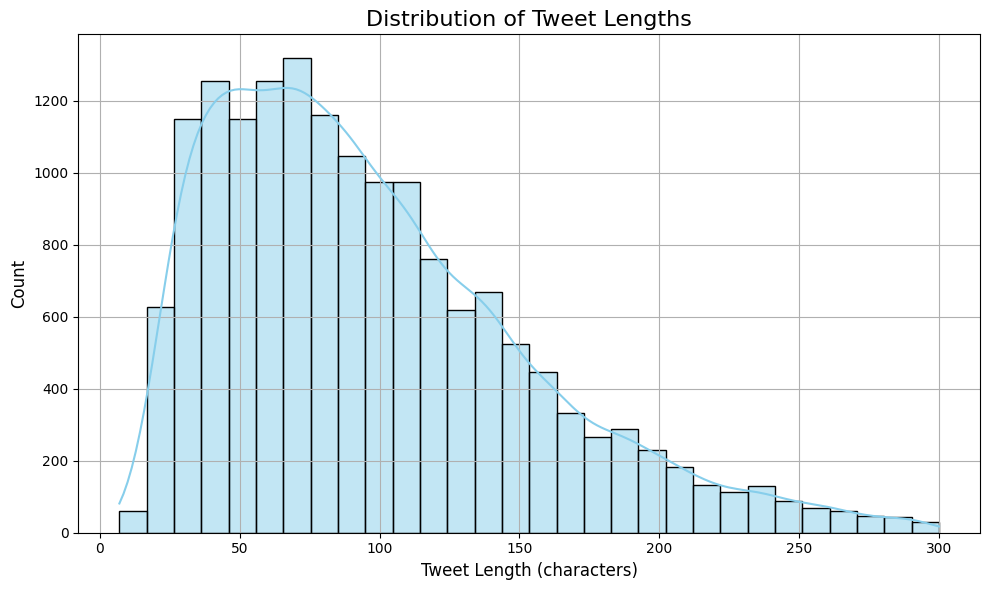

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['text_length'] = df['text'].apply(len)

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Tweet Lengths", fontsize=16)
plt.xlabel("Tweet Length (characters)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


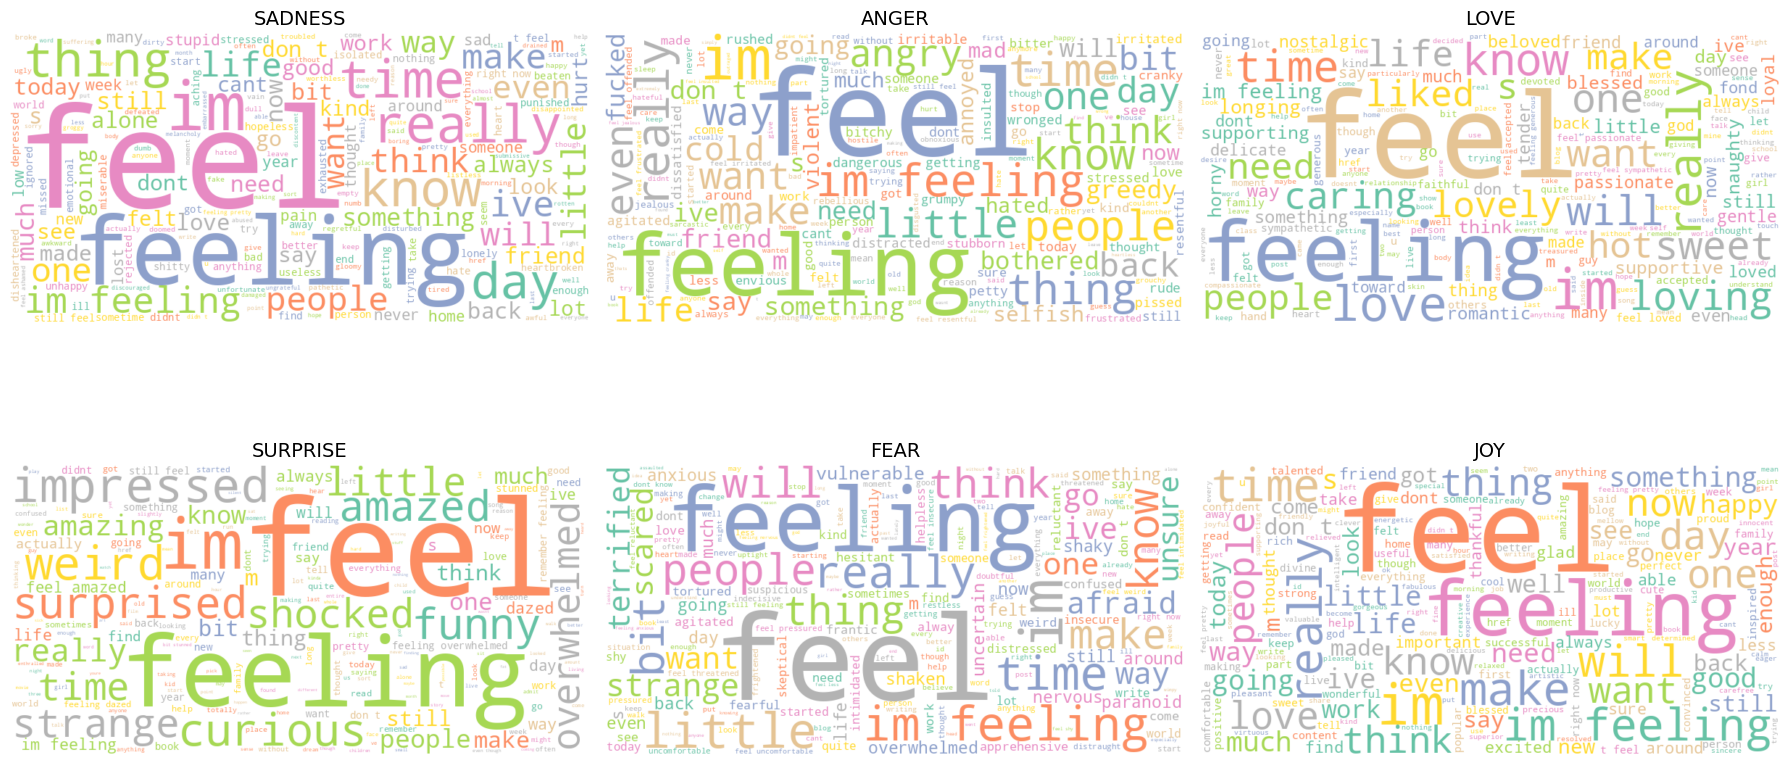

In [12]:
from wordcloud import WordCloud
from collections import defaultdict

emotion_texts = defaultdict(str)
for i, row in df.iterrows():
    emotion_texts[row['label_name']] += ' ' + row['text']

# Plot word clouds
plt.figure(figsize=(18, 10))
for i, (emotion, text) in enumerate(emotion_texts.items()):
    plt.subplot(2, 3, i+1)
    wc = WordCloud(width=800, height=400, background_color='white', colormap='Set2').generate(text)
    plt.imshow(wc, interpolation='bilinear')
    plt.title(emotion.upper(), fontsize=14)
    plt.axis('off')
plt.tight_layout()
plt.show()


In [13]:
for emotion in df['label_name'].unique():
    print(f"\n📌 {emotion.upper()}")
    samples = df[df['label_name'] == emotion].sample(3, random_state=1)['text'].values
    for idx, text in enumerate(samples, 1):
        print(f"{idx}. {text}")



📌 SADNESS
1. i still feel guilty to this day for taking a spot
2. i feel so empty and cold inside
3. i feel most unwelcome

📌 ANGER
1. i plot that makes the reader feel like he is with owen morgan during his dangerous undertaking
2. i feel i really wronged commodore
3. i feel like you feel this is a mistake but time is fucked up sleep won t take

📌 LOVE
1. i met a really cute girl who i feel kind of fond for today and normally girls are really complex to me but i can just be myself around her
2. i wake up i realize that my panty is wet and i feel very horny
3. i am feeling i still should be caring and concerned

📌 SURPRISE
1. i feel so weird about it
2. im not sure if anyone else will feel these but i was pleasantly surprised by my read of the first and second book
3. ive seen how mean other kids and adults can be to a child who doesnt fit into the norm and no way was i going to label him so he could be made to feel he was anything other than amazing

📌 FEAR
1. i feel especially vulne

In [ ]:
# Print all emotion label names from the dataset
print("Emotion Labels:", dataset['train'].features['label'].names)


Emotion Labels: ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']


# **REPORT - 2**

In [ ]:
from datasets import load_dataset
import pandas as pd
import re
import string
import nltk
import spacy

In [ ]:
# Download necessary resources
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Load SpaCy English model (lightweight) for lemmatization
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

# Load dataset from Hugging Face (this downloads and caches automatically)
dataset = load_dataset("dair-ai/emotion")

In [ ]:
# Convert to pandas DataFrame (raw original text & labels)
df_train = dataset['train'].to_pandas()
df_val = dataset['validation'].to_pandas()
df_test = dataset['test'].to_pandas()

In [ ]:
# Save the **original/raw** data locally as CSV
df_train.to_csv("train_original.csv", index=False)
df_val.to_csv("val_original.csv", index=False)
df_test.to_csv("test_original.csv", index=False)

In [ ]:
# Define preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"#(\w+)", r"\1", text)
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if token.text not in stop_words]
    return " ".join(tokens)

In [ ]:
# Apply preprocessing to all splits
df_train['clean_text'] = df_train['text'].apply(preprocess_text)
df_val['clean_text'] = df_val['text'].apply(preprocess_text)
df_test['clean_text'] = df_test['text'].apply(preprocess_text)

In [ ]:
# Save the **preprocessed** data locally as CSV
df_train.to_csv("train_preprocessed.csv", index=False)
df_val.to_csv("val_preprocessed.csv", index=False)
df_test.to_csv("test_preprocessed.csv", index=False)


In [ ]:

import os
print("Files saved in current directory:", os.listdir())

from google.colab import files
files.download("train_original.csv")
files.download("train_preprocessed.csv")

Files saved in current directory: ['.config', 'train_original.csv', 'val_preprocessed.csv', 'val_original.csv', 'test_original.csv', 'test_preprocessed.csv', 'train_preprocessed.csv', 'sample_data']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **REPORT - 3**

In [15]:
!pip install torchtext


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 87.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [16]:
import torch
import sys
!pip show torch torchtext
print("Python version:", sys.version)
print("Torch version:", torch.__version__)


Name: torch
Version: 2.6.0+cu124
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.11/dist-packages
Requires: filelock, fsspec, jinja2, networkx, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cudnn-cu12, nvidia-cufft-cu12, nvidia-curand-cu12, nvidia-cusolver-cu12, nvidia-cusparse-cu12, nvidia-cusparselt-cu12, nvidia-nccl-cu12, nvidia-nvjitlink-cu12, nvidia-nvtx-cu12, sympy, triton, typing-extensions
Required-by: accelerate, fastai, peft, sentence-transformers, timm, torchaudio, torchdata, torchtext, torchvision
---
Name: torchtext
Version: 0.18.0
Summary: Text utilities, models, transforms, and datasets for PyTorch.
Home-page: https://github.com/pytorch/text
Author: PyTorch Text Team
Author-email: packages@pytorch.org
License: BSD
Location: /usr/local/lib/py

Epoch 1, Training Loss: 1.6730
Epoch 2, Training Loss: 0.9949
Epoch 3, Training Loss: 0.5406
Epoch 4, Training Loss: 0.3353
Epoch 5, Training Loss: 0.2355
Epoch 6, Training Loss: 0.1596
Epoch 7, Training Loss: 0.1520
Epoch 8, Training Loss: 0.1255
Epoch 9, Training Loss: 0.0757
Epoch 10, Training Loss: 0.0676
Epoch 11, Training Loss: 0.0546
Epoch 12, Training Loss: 0.0424
Epoch 13, Training Loss: 0.0609
Epoch 14, Training Loss: 0.0475
Epoch 15, Training Loss: 0.0294

📋 Classification Report:
              precision    recall  f1-score   support

           0      0.943     0.905     0.923       946
           1      0.889     0.899     0.894      1021
           2      0.815     0.774     0.794       296
           3      0.853     0.899     0.876       427
           4      0.853     0.816     0.834       397
           5      0.649     0.850     0.736       113

    accuracy                          0.877      3200
   macro avg      0.833     0.857     0.843      3200
weighted avg   

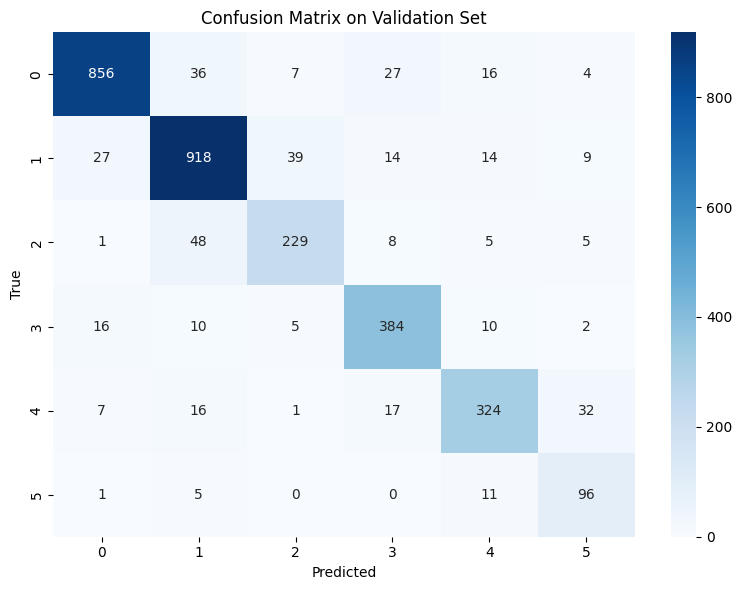

In [17]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import re
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

#  Load preprocessed dataset
df = pd.read_csv("train_preprocessed.csv")  # Must have 'text' and 'label' columns
texts = df["text"].tolist()
labels = df["label"].tolist()

# Tokenize text
def tokenize(text):
    text = re.sub(r"[^\w\s]", "", text.lower())
    return text.split()

tokenized_texts = [tokenize(t) for t in texts]

#  Build vocabulary
PAD_IDX = 0
UNK_IDX = 1
special_tokens = ["<PAD>", "<UNK>"]
word_counts = Counter(word for tokens in tokenized_texts for word in tokens)
vocab = special_tokens + [word for word, count in word_counts.items() if count >= 2]
word2idx = {word: idx for idx, word in enumerate(vocab)}
idx2word = {idx: word for word, idx in word2idx.items()}

def encode(tokens):
    return [word2idx.get(token, UNK_IDX) for token in tokens]

encoded_texts = [encode(tokens) for tokens in tokenized_texts]

#  Pad sequences
MAX_LEN = 50
def pad(seq):
    return seq[:MAX_LEN] + [PAD_IDX] * max(0, MAX_LEN - len(seq))

padded_texts = [pad(seq) for seq in encoded_texts]
labels = torch.tensor(labels)

#  Train-validation split
X_train, X_val, y_train, y_val = train_test_split(padded_texts, labels, test_size=0.2, random_state=42)

# Dataset class
class TweetDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.long)
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_ds = TweetDataset(X_train, y_train)
val_ds = TweetDataset(X_val, y_val)

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=32)

#  LSTM model (bidirectional)
class LSTMClassifier(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, output_dim, padding_idx):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=padding_idx)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_dim * 2, output_dim)  # bidirectional output

    def forward(self, x):
        embedded = self.embedding(x)
        _, (hidden, _) = self.lstm(embedded)
        hidden_cat = torch.cat((hidden[0], hidden[1]), dim=1)
        return self.fc(hidden_cat)

#  Model setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LSTMClassifier(
    vocab_size=len(vocab),
    embed_dim=128,
    hidden_dim=128,
    output_dim=6,  # 6 emotion labels
    padding_idx=PAD_IDX,
).to(device)

# Class weights for imbalance
y_train_np = y_train.numpy()
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_np), y=y_train_np)
weights = torch.tensor(class_weights, dtype=torch.float).to(device)
criterion = nn.CrossEntropyLoss(weight=weights)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in range(15):  # Train for 15 epochs
    model.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        output = model(X_batch)
        loss = criterion(output, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch + 1}, Training Loss: {avg_loss:.4f}")

# Evaluation on validation set
model.eval()
all_preds = []
all_labels = []
with torch.no_grad():
    for X_batch, y_batch in val_loader:
        X_batch = X_batch.to(device)
        outputs = model(X_batch)
        preds = outputs.argmax(dim=1).cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(y_batch.numpy())

print("\n📋 Classification Report:")
print(classification_report(all_labels, all_preds, digits=3))

# Confusion matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix on Validation Set")
plt.tight_layout()
plt.show()


# **REPORT-4 : Training,Validation,Testing and setting the hyper-parameters and stopped form overfitting using Regularization**

In [ ]:
pip install transformers datasets scikit-learn torch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 74.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 63.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 87.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

Epoch 01 | Train Loss: 1.6257 | Train Acc: 25.19% | Val Loss: 1.2032 | Val Acc: 39.65%
✅ Best model updated and saved!
Epoch 02 | Train Loss: 0.9509 | Train Acc: 58.06% | Val Loss: 0.6581 | Val Acc: 73.85%
✅ Best model updated and saved!
Epoch 03 | Train Loss: 0.5383 | Train Acc: 82.13% | Val Loss: 0.4537 | Val Acc: 85.35%
✅ Best model updated and saved!
Epoch 04 | Train Loss: 0.3421 | Train Acc: 89.19% | Val Loss: 0.3325 | Val Acc: 87.65%
✅ Best model updated and saved!
Epoch 05 | Train Loss: 0.2506 | Train Acc: 92.27% | Val Loss: 0.3982 | Val Acc: 87.75%
✅ Best model updated and saved!
Epoch 06 | Train Loss: 0.1886 | Train Acc: 94.01% | Val Loss: 0.4015 | Val Acc: 89.10%
✅ Best model updated and saved!
Epoch 07 | Train Loss: 0.1500 | Train Acc: 95.27% | Val Loss: 0.4275 | Val Acc: 88.90%
Epoch 08 | Train Loss: 0.1072 | Train Acc: 96.49% | Val Loss: 0.4538 | Val Acc: 88.20%
Epoch 09 | Train Loss: 0.0884 | Train Acc: 97.36% | Val Loss: 0.4846 | Val Acc: 89.45%
✅ Best model updated and 

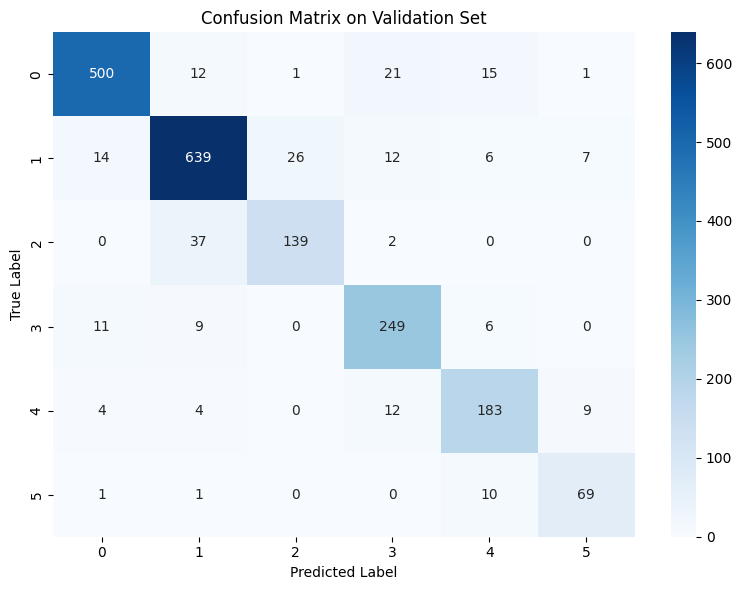

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import re
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight
import os

# -------------------------
# 1. Load datasets
# -------------------------
train_df = pd.read_csv("/content/train_preprocessed.csv")
val_df = pd.read_csv("/content/val_preprocessed.csv")

train_texts, train_labels = train_df["text"].tolist(), train_df["label"].tolist()
val_texts, val_labels = val_df["text"].tolist(), val_df["label"].tolist()

# -------------------------
# 2. Tokenization & Vocabulary
# -------------------------
def tokenize(text):
    text = re.sub(r"[^\w\s]", "", text.lower())
    return text.split()

tokenized_train = [tokenize(t) for t in train_texts]
tokenized_val = [tokenize(t) for t in val_texts]

PAD_IDX = 0
UNK_IDX = 1
special_tokens = ["<PAD>", "<UNK>"]

word_counts = Counter(word for tokens in tokenized_train for word in tokens)
vocab = special_tokens + [word for word, count in word_counts.items() if count >= 2]
word2idx = {word: idx for idx, word in enumerate(vocab)}
idx2word = {idx: word for word, idx in word2idx.items()}

def encode(tokens):
    return [word2idx.get(token, UNK_IDX) for token in tokens]

encoded_train = [encode(tokens) for tokens in tokenized_train]
encoded_val = [encode(tokens) for tokens in tokenized_val]

MAX_LEN = 50
def pad(seq):
    return seq[:MAX_LEN] + [PAD_IDX] * max(0, MAX_LEN - len(seq))

padded_train = [pad(seq) for seq in encoded_train]
padded_val = [pad(seq) for seq in encoded_val]

train_labels = torch.tensor(train_labels)
val_labels = torch.tensor(val_labels)

# -------------------------
# 3. Dataset & DataLoader
# -------------------------
class TweetDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.long)
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_ds = TweetDataset(padded_train, train_labels)
val_ds = TweetDataset(padded_val, val_labels)

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=32)

# -------------------------
# 4. LSTM Model with Dropout
# -------------------------
class LSTMClassifier(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, output_dim, padding_idx, dropout_rate=0.5):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=padding_idx)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True, bidirectional=True)
        self.dropout = nn.Dropout(dropout_rate)
        self.fc = nn.Linear(hidden_dim * 2, output_dim)

    def forward(self, x):
        embedded = self.embedding(x)
        _, (hidden, _) = self.lstm(embedded)
        hidden_cat = torch.cat((hidden[0], hidden[1]), dim=1)
        dropped = self.dropout(hidden_cat)
        return self.fc(dropped)

# -------------------------
# 5. Training Setup
# -------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = LSTMClassifier(
    vocab_size=len(vocab),
    embed_dim=128,
    hidden_dim=128,
    output_dim=6,
    padding_idx=PAD_IDX,
    dropout_rate=0.5
).to(device)

# Class weights
y_train_np = train_labels.numpy()
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_np), y=y_train_np)
weights = torch.tensor(class_weights, dtype=torch.float).to(device)

criterion = nn.CrossEntropyLoss(weight=weights)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# -------------------------
# 6. Training Loop with Anti-Overfitting
# -------------------------
best_val_acc = 0
for epoch in range(10):
    model.train()
    total_loss = 0
    all_train_preds = []
    all_train_labels = []

    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()

        # Gradient clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

        optimizer.step()
        total_loss += loss.item()

        preds = outputs.argmax(dim=1)
        all_train_preds.extend(preds.cpu().numpy())
        all_train_labels.extend(y_batch.cpu().numpy())

    avg_loss = total_loss / len(train_loader)
    train_acc = accuracy_score(all_train_labels, all_train_preds)

    # Validation phase
    model.eval()
    all_val_preds = []
    all_val_labels = []
    val_loss = 0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            val_loss += loss.item()

            preds = outputs.argmax(dim=1)
            all_val_preds.extend(preds.cpu().numpy())
            all_val_labels.extend(y_batch.cpu().numpy())

    val_acc = accuracy_score(all_val_labels, all_val_preds)
    val_loss /= len(val_loader)

    print(f"Epoch {epoch+1:02d} | Train Loss: {avg_loss:.4f} | Train Acc: {train_acc*100:.2f}% | Val Loss: {val_loss:.4f} | Val Acc: {val_acc*100:.2f}%")

    # Monitor best validation accuracy
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), "best_lstm_model.pth")
        print("✅ Best model updated and saved!")

# -------------------------
# 7. Final Evaluation
# -------------------------
print("\n📋 Final Evaluation on Validation Set:")
print(classification_report(all_val_labels, all_val_preds, digits=3))

cm = confusion_matrix(all_val_labels, all_val_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix on Validation Set")
plt.tight_layout()
plt.show()


In [ ]:
test_df = pd.read_csv("/content/test_original.csv")
test_texts = test_df["text"].tolist()
test_labels = test_df["label"].tolist()  # If labels are available

tokenized_test = [tokenize(t) for t in test_texts]
encoded_test = [encode(t) for t in tokenized_test]
padded_test = [pad(seq) for seq in encoded_test]

test_dataset = TweetDataset(padded_test, torch.tensor(test_labels))
test_loader = DataLoader(test_dataset, batch_size=32)

model.eval()
all_test_preds, all_test_labels = [], []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        outputs = model(X_batch)
        preds = outputs.argmax(dim=1)
        all_test_preds.extend(preds.cpu().numpy())
        all_test_labels.extend(y_batch.cpu().numpy())

print("\n✅ Final Test Accuracy:", accuracy_score(all_test_labels, all_test_preds))



✅ Final Test Accuracy: 0.8865


# **Week-5**

In [1]:
!pip install --upgrade datasets transformers fsspec


  Using cached fsspec-2025.5.1-py3-none-any.whl.metadata (11 kB)


Using device: cuda


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/2000 [00:00<?, ? examples/s]


Epoch 1


100%|██████████| 1000/1000 [05:56<00:00,  2.81it/s]


Train Loss: 0.4782 | Train Accuracy: 0.8297
Val Loss: 0.1590 | Val Accuracy: 0.9310

Epoch 2


100%|██████████| 1000/1000 [05:55<00:00,  2.81it/s]


Train Loss: 0.1378 | Train Accuracy: 0.9401
Val Loss: 0.1376 | Val Accuracy: 0.9395

Epoch 3


100%|██████████| 1000/1000 [05:55<00:00,  2.82it/s]


Train Loss: 0.1032 | Train Accuracy: 0.9505
Val Loss: 0.1329 | Val Accuracy: 0.9390

Test Loss: 0.1445 | Test Accuracy: 0.9305

Classification Report:
              precision    recall  f1-score   support

     sadness       0.98      0.96      0.97       581
         joy       0.95      0.96      0.95       695
        love       0.84      0.84      0.84       159
       anger       0.93      0.93      0.93       275
        fear       0.92      0.84      0.88       224
    surprise       0.67      0.89      0.77        66

    accuracy                           0.93      2000
   macro avg       0.88      0.90      0.89      2000
weighted avg       0.93      0.93      0.93      2000



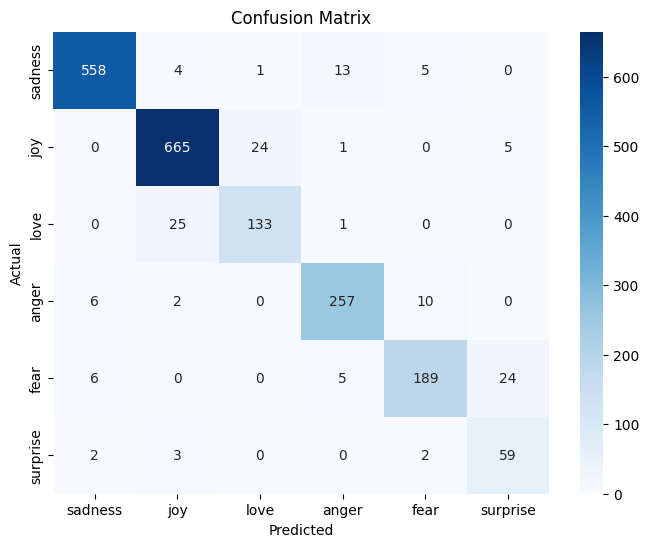


Per-class TP, FP, FN, TN:
SADNESS: TP=558, FP=14, FN=23, TN=1405
JOY: TP=665, FP=34, FN=30, TN=1271
LOVE: TP=133, FP=25, FN=26, TN=1816
ANGER: TP=257, FP=20, FN=18, TN=1705
FEAR: TP=189, FP=17, FN=35, TN=1759
SURPRISE: TP=59, FP=29, FN=7, TN=1905


In [6]:
# ✅ STEP 1: Install packages (only needed once in Colab)
!pip install -q transformers datasets scikit-learn seaborn

# ✅ STEP 2: Imports
import torch
from torch.utils.data import DataLoader
from transformers import BertTokenizerFast, BertForSequenceClassification
from torch.optim import AdamW
from datasets import load_dataset
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ✅ STEP 3: Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# ✅ STEP 4: Load dataset
dataset = load_dataset("dair-ai/emotion")

# ✅ STEP 5: Load tokenizer and model
tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased")
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=6).to(device)

# ✅ STEP 6: Tokenize dataset
def tokenize_function(example):
    return tokenizer(example["text"], padding="max_length", truncation=True, max_length=128)

encoded_dataset = dataset.map(tokenize_function, batched=True)
encoded_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

# ✅ STEP 7: Dataloaders
train_loader = DataLoader(encoded_dataset["train"], batch_size=16, shuffle=True)
val_loader = DataLoader(encoded_dataset["validation"], batch_size=16)
test_loader = DataLoader(encoded_dataset["test"], batch_size=16)

# ✅ STEP 8: Optimizer
optimizer = AdamW(model.parameters(), lr=2e-5)

# ✅ STEP 9: Training and Evaluation Functions
def train_epoch(model, loader):
    model.train()
    total_loss = 0
    all_preds = []
    all_labels = []
    for batch in tqdm(loader):
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["label"].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        preds = torch.argmax(outputs.logits, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

    acc = accuracy_score(all_labels, all_preds)
    return total_loss / len(loader), acc

def evaluate(model, loader):
    model.eval()
    total_loss = 0
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for batch in loader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["label"].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            total_loss += loss.item()

            preds = torch.argmax(outputs.logits, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    acc = accuracy_score(all_labels, all_preds)
    return total_loss / len(loader), acc, all_labels, all_preds

# ✅ STEP 10: Fine-tune the model
epochs = 3
for epoch in range(epochs):
    print(f"\nEpoch {epoch + 1}")
    train_loss, train_acc = train_epoch(model, train_loader)
    val_loss, val_acc, _, _ = evaluate(model, val_loader)
    print(f"Train Loss: {train_loss:.4f} | Train Accuracy: {train_acc:.4f}")
    print(f"Val Loss: {val_loss:.4f} | Val Accuracy: {val_acc:.4f}")

# ✅ STEP 11: Final Test Evaluation
test_loss, test_acc, test_labels, test_preds = evaluate(model, test_loader)
print(f"\nTest Loss: {test_loss:.4f} | Test Accuracy: {test_acc:.4f}")

# ✅ STEP 12: Classification Report
print("\nClassification Report:")
print(classification_report(test_labels, test_preds, target_names=dataset["train"].features["label"].names))

# ✅ STEP 13: Confusion Matrix
cm = confusion_matrix(test_labels, test_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=dataset["train"].features["label"].names,
            yticklabels=dataset["train"].features["label"].names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ✅ STEP 14: True Positive, False Positive, False Negative, True Negative per class
def compute_confusion_details(cm):
    TP = np.diag(cm)
    FP = cm.sum(axis=0) - TP
    FN = cm.sum(axis=1) - TP
    TN = cm.sum() - (TP + FP + FN)
    return TP, FP, FN, TN

TP, FP, FN, TN = compute_confusion_details(cm)
labels = dataset["train"].features["label"].names

print("\nPer-class TP, FP, FN, TN:")
for i, label in enumerate(labels):
    print(f"{label.upper()}: TP={TP[i]}, FP={FP[i]}, FN={FN[i]}, TN={TN[i]}")
